In [6]:
color_mapping = {
    'F2': (0.0, 0.0, 1.0, 0.6),    # darkblue with 0.6 alpha
    'F1': (0.0, 0.6902, 1.0, 0.6), # deepskyblue with 0.6 alpha
    'C': (0.5, 0.5, 0.5, 0.6),     # grey with 0.6 alpha
    'B1': (0.8039, 0.0, 0.0, 0.6), # indianred with 0.6 alpha
    'B2': (0.5451, 0.0, 0.0, 0.6)}  # darkred with 0.6 alpha

color_mapping_seasons = {
    'Summer': (1.0, 0.6471, 0.0, 0.6), # orange with 0.6 alpha
    'Winter': (0.0, 0.0, 1.0, 0.6)}     # blue with 0.6 alpha}

quintile_mapping = {1: 'F2', 2: 'F1', 3: 'C', 4: 'B1', 5: 'B2'}
quintile_cats = ['F2','F1', 'C', 'B1', 'B2']
n= 5
quintile_cats_season = ['Summer', 'Winter']    

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
import os
import sys
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt    
import re
import pickle
import matplotlib.patches as mpatches
from statsmodels.graphics.mosaicplot import mosaic
from tabulate import tabulate

sys.path.insert(1, '../')
# from Create_Profiles_Functions import *
from Prepare_Data_Functions import *
from Plot_events_functions import *

# Create mosaic plots from UKCP18 data
For events with n data points which is a multiple of 5

In [94]:
def something (filepath, trim_events=False):
    with open(f"/nfs/a319/gy17m2a/PhD/ProcessedData/Profiles/{filepath}_trimmed_events.pkl", 'rb') as f:
        trimmed_events = pickle.load(f)
    
    ### Select out events of length 5
    if trim_events == True:
        trimmed_events = select_events_with_multiples_of_x(trimmed_events, n)    

    # ### Create dataframe
    precip_values = [df['precipitation (mm/hr)'].tolist() for df in trimmed_events]
    seasons_summary = [get_season(extract_first_date(df)) for df in trimmed_events]
    trimmed_events = pd.DataFrame({'precipitation (mm/hr)': precip_values, 'Season':seasons_summary})
    # # Determing the max quintile
    trimmed_events['max_quintile'] = trimmed_events['precipitation (mm/hr)'].apply(lambda x: find_part_with_most_rain(x, n))
    # Add the durations
    trimmed_events['duration'] = trimmed_events['precipitation (mm/hr)'].apply(lambda x: len(x) / 2)
    trimmed_events = add_duration_cats_based_on_data(trimmed_events)
    trimmed_events['Loading'] = trimmed_events['max_quintile'].map(quintile_mapping)
    trimmed_events['Loading'] = pd.Categorical(trimmed_events['Loading'], categories=quintile_cats, ordered=True)
    
    return trimmed_events

In [98]:
ukcp18_present_trimmed = something("UKCP18_30mins/bc005/good", trim_events=True)
ukcp18_present = something("UKCP18_30mins/bc005/good", trim_events=False)

ukcp18_future_trimmed = something("UKCP18_30mins/bb198/good", trim_events=True)
ukcp18_future = something("UKCP18_30mins/bb198/good", trim_events=False)

nimrod_trimmed = something("NIMROD_30mins/WholeYear/NIMROD_2.2km_filtered_100_good", trim_events=True)
nimrod = something("NIMROD_30mins/WholeYear/NIMROD_2.2km_filtered_100_good", trim_events=False)

In [93]:
# # Create subplots: 6 rows, 1 column for each pair of plots
# fig, axs = plt.subplots(nrows=6, figsize=(16, 8), sharex=True)

# # Loop through the range and plot on separate axes
# for ax_num, len_5 in enumerate(range(5, 20, 5)):
#     # Filter data for the current duration
#     lens_df = ukcp18_events_5[ukcp18_events_5['duration'] == len_5 / 2]
    
#     # Plot UKCP18 data
#     create_single_variable_mosaic_plot(axs[2 * ax_num], lens_df, 'Loading', quintile_cats, color_mapping_loadings_5, f"{len_5}_UKCP18")

#     # Filter data for NIMROD
#     lens_df = nimrod_events_5[nimrod_events_5['duration'] == len_5 / 2]
    
#     # Plot NIMROD data
#     create_single_variable_mosaic_plot(axs[2 * ax_num + 1], lens_df, 'Loading', quintile_cats, color_mapping_loadings_5, f"{len_5}_NIMROD")


In [87]:
# fig, axs = plt.subplots(nrows =13, figsize=(16,16), sharex=True)
# for ax_num, len_5 in enumerate(range(5,75,5)):
#     lens_df = future_ukcp18_events_5[future_ukcp18_events_5['duration']==len_5/2]
#     create_single_variable_mosaic_plot(axs[ax_num], lens_df, 'Loading', quintile_cats,color_mapping_loadings_5, len_5)

## Check overall distribution between categories

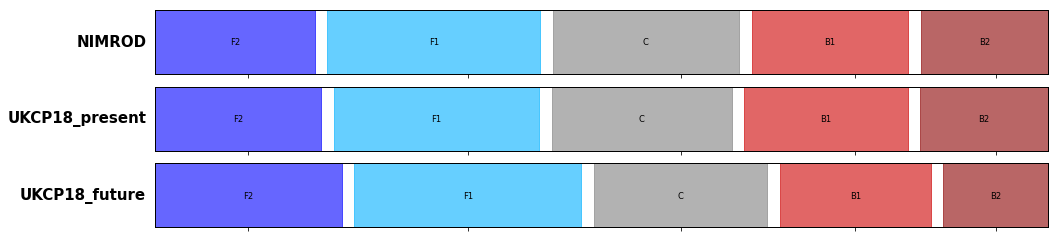

In [104]:
# Desired order of loading categories
fig, axs = plt.subplots(nrows =3, figsize=(16,4), sharex=True)
create_single_variable_mosaic_plot(axs[0], nimrod, 'Loading', quintile_cats,color_mapping_loadings_5, 'NIMROD')
create_single_variable_mosaic_plot(axs[1], ukcp18_present, 'Loading', quintile_cats, color_mapping_loadings_5, 'UKCP18_present')
create_single_variable_mosaic_plot(axs[2], ukcp18_future, 'Loading', quintile_cats,color_mapping_loadings_5, 'UKCP18_future')

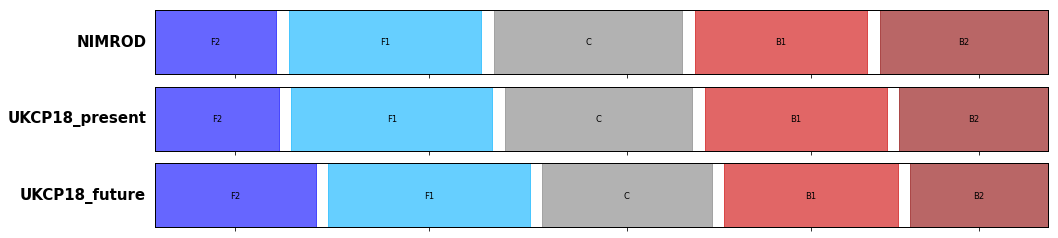

In [102]:
# Desired order of loading categories
fig, axs = plt.subplots(nrows =3, figsize=(16,4), sharex=True)
create_single_variable_mosaic_plot(axs[0], nimrod_trimmed, 'Loading', quintile_cats,color_mapping_loadings_5, 'NIMROD')
create_single_variable_mosaic_plot(axs[1], ukcp18_present_trimmed, 'Loading', quintile_cats, color_mapping_loadings_5, 'UKCP18_present')
create_single_variable_mosaic_plot(axs[2], ukcp18_future_trimmed, 'Loading', quintile_cats,color_mapping_loadings_5, 'UKCP18_future')

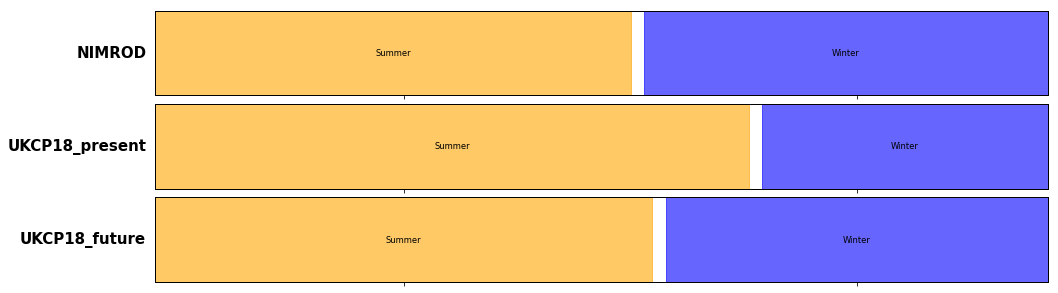

In [96]:
# Desired order of loading categories
fig, axs = plt.subplots(nrows=3, figsize=(16, 5), sharex=True)  # Adjusted figure size

# Plot with custom labels
create_single_variable_mosaic_plot(axs[0], nimrod_events_5, 'Season', quintile_cats_season, color_mapping_seasons, 'NIMROD')
create_single_variable_mosaic_plot(axs[1], ukcp18_events_5, 'Season', quintile_cats_season, color_mapping_seasons, 'UKCP18_present')
create_single_variable_mosaic_plot(axs[2], future_ukcp18_events_5, 'Season', quintile_cats_season, color_mapping_seasons, 'UKCP18_future')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.1)  # hspace controls the height space between subplots

plt.show()


## Compare proportion of events in each loading category (split by duration)

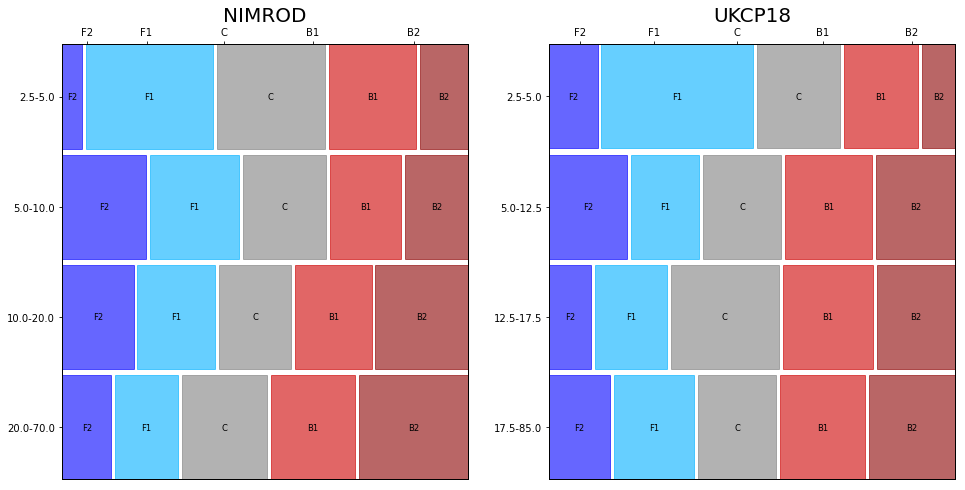

In [325]:
fig, axs = plt.subplots(ncols =2, figsize=(16,8))
create_mosaic_plot(axs[0],nimrod_events_5 , cross_variable1 = 'DurationRange_personalised', cross_variable2='Loading', include_all= False)
axs[0].set_title('NIMROD', fontsize=20)
create_mosaic_plot(axs[1],ukcp18_events_5, cross_variable1 = 'DurationRange_personalised', cross_variable2='Loading', include_all= False)
axs[1].set_title('UKCP18', fontsize=20);

# Mosaic plots - split by season

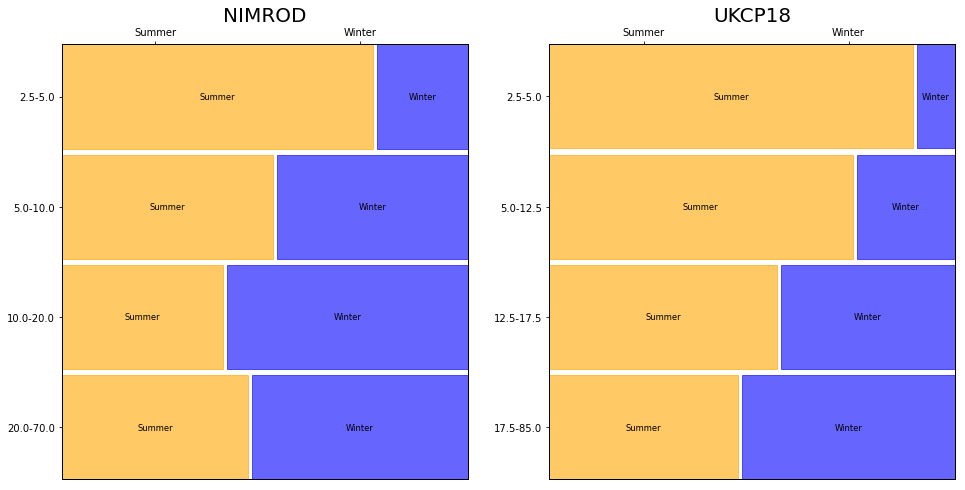

In [317]:
fig, axs = plt.subplots(ncols =2, figsize=(16,8))
create_mosaic_plot(axs[0],nimrod_events_5 , cross_variable1 = 'DurationRange_personalised', cross_variable2='Season', include_all= False)
axs[0].set_title('NIMROD', fontsize=20)
create_mosaic_plot(axs[1],ukcp18_events_5, cross_variable1 = 'DurationRange_personalised', cross_variable2='Season', include_all= False)
axs[1].set_title('UKCP18', fontsize=20);

In [363]:
# Define the normalization function
def normalize_precipitation(df):
    min_val = df['precipitation (mm/hr)'].min()
    max_val = df['precipitation (mm/hr)'].max()
    df['precipitation (mm/hr)'] = (df['precipitation (mm/hr)'] - min_val) / (max_val - min_val)
    return df

### Read in the raw event data
filepath = "UKCP18_30mins/bc005/good"
with open(f"/nfs/a319/gy17m2a/PhD/ProcessedData/Profiles/{filepath}_trimmed_events.pkl", 'rb') as f:
    trimmed_events = pickle.load(f)

len_5 = select_events_of_length_5(trimmed_events)    
# Normalize the precipitation (mm/hr) column for each event
len_5 = [normalize_precipitation(df) for df in len_5]


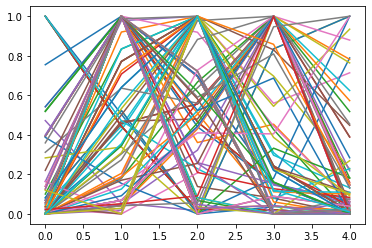

In [365]:
for event in len_5[:100]:
    plt.plot(event['precipitation (mm/hr)'])

# Contingency tables

## Compare summary profiles for 1km for 5, 10, 15, 20 clusters

In [259]:
def create_profiles(profiles, num_clusters):
        
    # Create and fit the model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(profiles.tolist())

    return kmeans

def plot_profiles(kmeans_clusters,durations, axs, row, color, linestyle):
    
    durations = durations.tolist()
    
    # Get cluster labels for each profile
    labels = kmeans_clusters.labels_
    centroids = kmeans_clusters.cluster_centers_
    df = pd.DataFrame({'cluster_num': labels, 'duration': durations})
    df['duration'] = pd.to_numeric(df['duration'])
    df.groupby('cluster_num')['duration'].mean()
    
    for num, centroid_cumulative in enumerate(centroids):
        
        # Time in hours
        time_hours = np.arange(len(centroid_cumulative))  
        
        # Convert cumulative to intensity (mm/hour)
        intensity = np.diff(centroid_cumulative) / np.diff(time_hours)
        
        # Calculate average intensity
        average_intensity = np.sum(intensity) / (time_hours[-1] - time_hours[0])

        # Normalize intensity by average intensity
        normalized_intensity = intensity / average_intensity
        
        # Find portion which is heaviest
        # heaviest_segment = categorize_normalized_rainstorm(centroid_cumulative)
        quintile_with_max_value = find_quintile_with_max_value(intensity)
        i = quintile_with_max_value

        axs[row, i].plot(time_hours[1:], normalized_intensity, color=color, linestyle=linestyle)
        if row == 0:
            axs[row, 0].set_title('F2')
            axs[row, 1].set_title('F1')
            axs[row, 2].set_title('C')
            axs[row, 3].set_title('B1')
            axs[row, 4].set_title('B2')

291
100


TypeError: cannot unpack non-iterable KMeans object

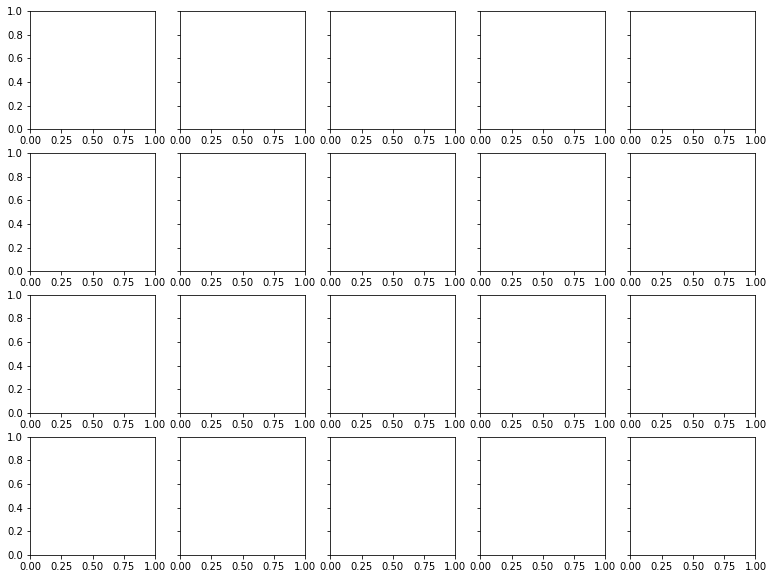

In [260]:
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(13, 10), sharey=True)

data = format_data_for_plots("NIMROD_5mins/WholeYear/NIMROD_1km_unfiltered", duration_style = 'Real', seasons_flag=True, percent =100)
for row, cluster_numbers in enumerate([5,10,15,20]):
    kmeans_clusters, durations = create_profiles(data['Profile'],  num_clusters = cluster_numbers)  
    plot_profiles(kmeans_clusters,data['Duration'], axs, row, color='black', linestyle='solid')
    
data = format_data_for_plots("UKCP18_30mins/bc005/model", duration_style = 'Real', seasons_flag=True, percent=100)
for row, cluster_numbers in enumerate([5,10,15,20]):
    kmeans_clusters, durations = create_profiles(data['Profile'], num_clusters = cluster_numbers)  
    plot_profiles(kmeans_clusters,data['Duration'], axs, row, color='green', linestyle='solid') 
    
    
# Define the legend patches
black_patch = mpatches.Patch(color='black', label='NIMROD (filtered (100))')
green_patch = mpatches.Patch(color='darkgreen', label='UKCP18 (BC005)')

# Adjust the layout to make space for the legend
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Add the legend to the figure
fig.legend(handles=[black_patch, green_patch], loc='upper center', fontsize = 14, bbox_to_anchor=(0.5, 1), ncol=3);

# Compare to rain gauge profiles - top 10% of storms

In [4]:
# Read in profiles
rvh_profiles = pd.read_csv("../../CatchmentAnalysis/CreateSyntheticRainfallEvents/ObservedProfiles/kmeans_15clustersPerDur.csv")
# Just keep prain (proportion of rainfall in each timestep)
rvh_profiles = rvh_profiles[rvh_profiles['Variable'] == 'irain']
rvh_profiles = rvh_profiles[rvh_profiles['Duration'] == '[2:10 - 6:45) hr']

19395
10


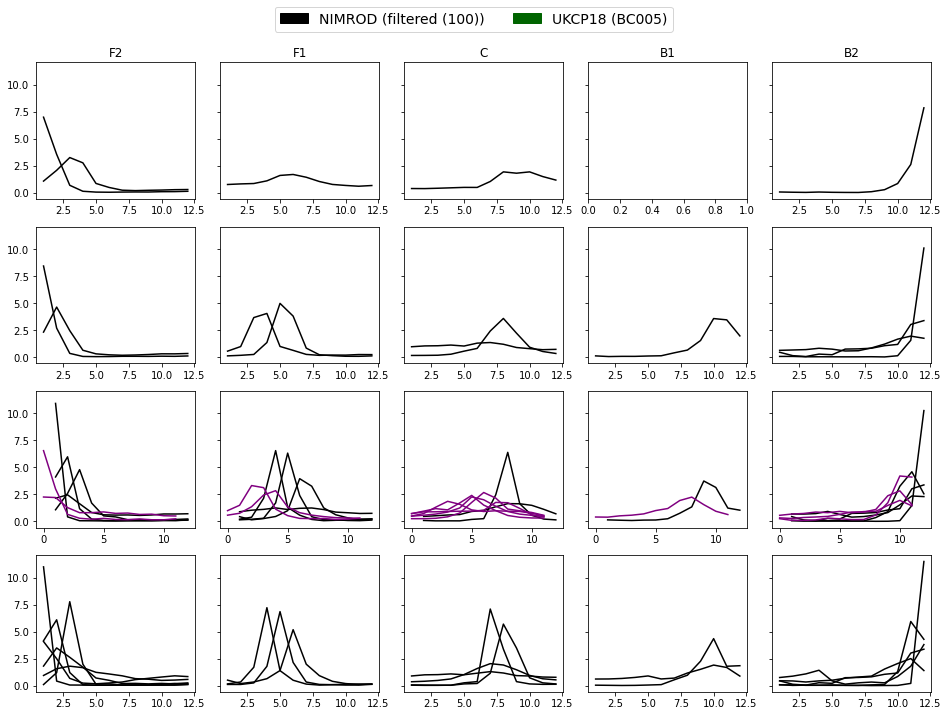

In [12]:
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(13, 10), sharey=True)

data = format_data_for_plots("NIMROD/WholeYear/NIMROD_1km_filtered_100", duration_style = 'Real', seasons_flag=True, percent=10)
for row, cluster_numbers in enumerate([5,10,15,20]):
    kmeans_clusters = create_profiles(data['Profile'],  num_clusters = cluster_numbers)  
    plot_profiles(kmeans_clusters,data['Duration'], axs, row, color='black', linestyle='solid')

for cluster_num in range(1,14):
    cluster1=rvh_profiles[rvh_profiles['Cluster']==cluster_num]
    cluster1 = cluster1[:-2]
    cluster1['Mean_cumulative'] = cluster1['Mean'].cumsum()
    quintile_with_max_value = find_quintile_with_max_cumulative_rainfall(np.array(cluster1['Mean_cumulative']))
    axs[2, quintile_with_max_value-1].plot(range(len(cluster1)),cluster1['Mean'], color='purple')  
    
# Define the legend patches
black_patch = mpatches.Patch(color='black', label='NIMROD (filtered (100))')
green_patch = mpatches.Patch(color='darkgreen', label='UKCP18 (BC005)')

# Adjust the layout to make space for the legend
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Add the legend to the figure
fig.legend(handles=[black_patch, green_patch], loc='upper center', fontsize = 14, bbox_to_anchor=(0.5, 1), ncol=3);

# Plot profiles clouds

119020
100


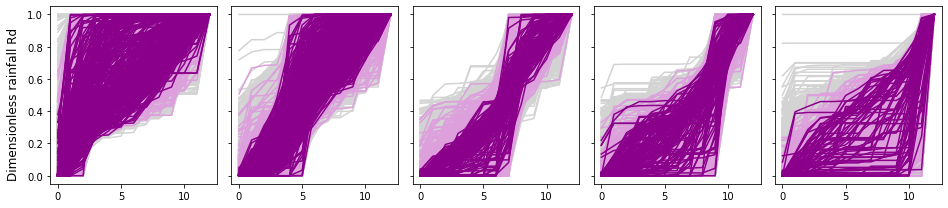

In [143]:
# Example usage:
data = format_data_for_plots("UKCP18_30mins/bc005/model", duration_style='Real', seasons_flag=True, percent=100)
# Plot profiles categorized by percentiles
plot_profiles_by_percentile(data['Profile'], data['Volume'], data['MaxQuintile'], percent_10=90, percent_1=99)


19395
100


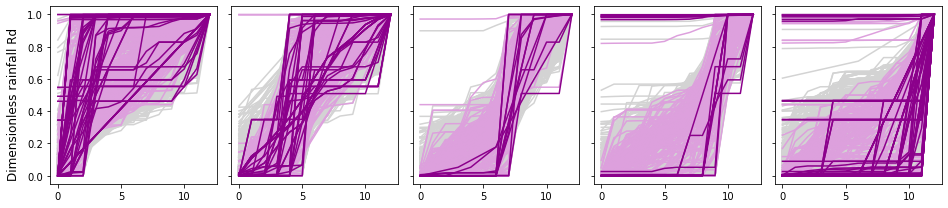

In [144]:
data = format_data_for_plots("NIMROD/WholeYear/NIMROD_1km_filtered_100", duration_style='Real', seasons_flag=True, percent=100)
# Plot profiles categorized by percentiles
plot_profiles_by_percentile(data['Profile'], data['Volume'], data['MaxQuintile'], percent_10=90, percent_1=99)